# MSDS-432: Module 7 - Implementing Dijkstra's Algorithm  
Jason Adam  

Below is the Graph that will be used throughout the assignment.  
![](../imgs/RoadTrip_NYC_to_L.A.JPG)

## Imports

In [1]:
from typing import List, Tuple

import matplotlib.pyplot as plt
import pandas as pd

%load_ext blackcellmagic

## Construct Graph

In [2]:
graph: dict = {
    "NYC": {"DC": 2, "Indianapolis": 11, "Pittsburg": 7},
    "DC": {"Atlanta": 2},
    "Atlanta": {"New Orleans": 2},
    "New Orleans": {"Dallas": 2},
    "Dallas": {"Albuquerque": 2},
    "Albuquerque": {"Phoenix": 2},
    "Phoenix": {"Las Vegas": 2, "San Diego": 5},
    "Las Vegas": {"San Diego": 2, "Los Angeles": 5},
    "San Diego": {"Los Angeles": 2},
    "Indianapolis": {"Kansas City": 8},
    "Kansas City": {"Denver": 7},
    "Denver": {"Salt Lake City": 6},
    "Salt Lake City": {"Las Vegas": 9},
    "Pittsburg": {"Cincinnati": 6},
    "Cincinnati": {"St Louis": 8},
    "St Louis": {"Oklahoma City": 7},
    "Oklahoma City": {"Albuquerque": 9},
    "Los Angeles": {}
}

## 1. BFS Algorithm  
First, use the breadth-first algorithm to find the quickest way to get to L.A from NYC and calculate the time that it will take to get to L.A. from NYC using the breadth first algorithm.  (Even though BFS does not use weighted edges, we will indirectly use them to calculate the time of the route).

In [3]:
def bfs(graph_to_search: dict, start: str, end: str) -> List[Tuple]:
    """Breadth-First Search Algorithm.
    
    Parameters
    ----------
    graph_to_search: dict
        Graph represented as a dictionary.
    start: str
        Starting value.
    end: str
        Ending value or destination.
        
    Returns
    -------
    List[Tuple]:
        List containing shortest path from 
        start to end (added distances).
        Ex.: [("NYC", 0), ("DC", 5)]
    """
    queue: list = [[(start, 0)]]
    visited: set = set()

    while queue:
        # Gets the first path in the queue
        path: tuple = queue.pop(0)

        # Gets the last node in the path
        vertex: str = path[-1][0]

        # Checks if we got to the end
        if vertex == end:
            return path
        # We check if the current node is already in the visited nodes set in order not to recheck it
        elif vertex not in visited:
            # enumerate all adjacent nodes, construct a new path and push it into the queue
            # for current_neighbour in graph_to_search.get(vertex, {}):
            for k, v in graph_to_search[vertex].items():
                new_path: List[Tuple] = list(path)
                new_path.append((k, v))
                queue.append(new_path)

            # Mark the vertex as visited
            visited.add(vertex)


# Run BFS on the Graph
shortest_path = bfs(graph, "NYC", "Los Angeles")

## 2. Print the Route

In [4]:
def calc_route(path: List[Tuple]) -> None:
    """Printable output for shortest path.
    
    Parameters
    ----------
    path: List[Tuple]
        List of tuples
        Ex. [("NYC", 0), ("DC", 5)]
    
    Returns
    -------
    None
    """
    for i, v in enumerate(path):
        if i == len(path) - 1:
            print(v[0])
        else:
            print(f"{v[0]} --> ", end="")


calc_route(shortest_path)

NYC --> Indianapolis --> Kansas City --> Denver --> Salt Lake City --> Las Vegas --> Los Angeles


In [5]:
def calc_distance(path: List[Tuple], algo: str) -> str:
    """Printable output for shortest path distance.
    
    Parameters
    ----------
    path: List[Tuple]
        List of tuples
        Ex. [("NYC", 0), ("DC", 5)]
    algo: str
        Name of algorithm.
    
    Returns
    -------
    str:
        String output with distance.
    """
    t: int = 0
    for i in path:
        t += i[1]
    return f"The total distance from NYC to LA using {algo} was {t}"
    

print(calc_distance(shortest_path, "BFS"))

The total distance from NYC to LA using BFS was 46


## 3. Dijkstra's Algorithm  
Next, use Dijkstra's algorithm to find the most optimal route to get to L.A from NYC, capture the time that it will take to get to L.A (use the weights in the algorithm assigned to the routes).

In [6]:
def dijkstra(
    graph: dict,
    src: str,
    dest: str,
    visited: list = None,
    distances: dict = None,
    predecessors: dict = None,
) -> None:
    """Recursive implementation of Dijkstra's algo.
    
    Parameters
    ----------
    graph: dict
        Graph represented as dictionary of dictionaries.
    src: str
        Starting City.
    dest: str
        Ending City.
    visited: list
        List of visited cities.
    distances: dict
        Dictionary of distances to nodes.
    predecessors: dict
        Dictionary of preceding nodes in graph.
        
    Returns
    -------
    None
    """
    if visited is None:
        visited = []
    if distances is None:
        distances = {}
    if predecessors is None:
        predecessors = {}
    # Termination Condition
    if src == dest:
        # Build the shortest path and print it
        path: list = []
        pred: str = dest
        while pred != None:
            path.append(pred)
            pred = predecessors.get(pred, None)
        # Reverse the array for printed path
        readable = path[0]
        for index in range(1, len(path)):
            readable = f"{path[index]} --> {readable}"
        # Print path and cost
        print(f"path: {readable}")
        print(f"cost = {str(distances[dest])}")
    else:
        # Initialize the cost on first run
        if not visited:
            distances[src] = 0
        # Visit adjacent nodes
        for neighbor in graph[src]:
            if neighbor not in visited:
                new_distance = distances[src] + graph[src][neighbor]
                if new_distance < distances.get(neighbor, float("inf")):
                    distances[neighbor] = new_distance
                    predecessors[neighbor] = src
        # Mark as visited
        visited.append(src)
        # Recurse with non visited node with lowest distance.
        unvisited: dict = {}
        for k in graph:
            if k not in visited:
                unvisited[k] = distances.get(k, float("inf"))
        x = min(unvisited, key=unvisited.get)
        dijkstra(graph, x, dest, visited, distances, predecessors)

## 4. Print the Route

In [7]:
dijkstra(graph, "NYC", "Los Angeles")

path: NYC --> DC --> Atlanta --> New Orleans --> Dallas --> Albuquerque --> Phoenix --> Las Vegas --> San Diego --> Los Angeles
cost = 18


## 5. Compare Algorithms  
Compare time of Breadth-first algorithm with Dijkstra's algorithm in terms of trip time, stops, computation complexity.  Discuss the reason for differences in methods.

In [8]:
compare_df: pd.DataFrame = pd.DataFrame(
    {"Algorithm": ["BFS", "Dijkstra's"], "Stops": [6, 10], "TripTime": [46, 18],}
)
    
compare_df

,Algorithm,Stops,TripTime
0,BFS,6,46
1,Dijkstra's,10,18


## 6. Visualize Algorithm Performance  
Use Python (matplotlib or Seaborn) or JavaScript (D3) visualization tools to illustrate algorithm performance.

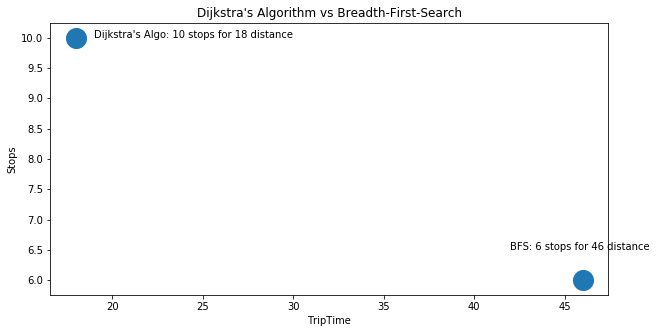

In [9]:
compare_df.plot.scatter(x="TripTime", y="Stops", s=400, figsize=(10, 5))
plt.text(x=42, y=6.5, s="BFS: 6 stops for 46 distance")
plt.text(x=19, y=10, s="Dijkstra's Algo: 10 stops for 18 distance")
plt.title("Dijkstra's Algorithm vs Breadth-First-Search")
plt.show()

We can clearly see that the BFS found a much shorter path to the destination in terms of stops, resulting in only 6 total stops, but it totalled 46 units in distance. Dijkstra's Algorithm took 10 stops, but it achieved a minimal distance of 18 units.  The comparison isn't quite fair as BFS is meant for an unweighted graph and Dijkstra's is intended for a weighted graph with all positive weights. I'm not sure if this graph is the best way to display the disparity, but it seems to get the point across. In a situation where the distance between stops is known, the Dijkstra's Algorithm outperforms BFS by a large margin.

## Executive Summary  
Dijkstra's Algorithm can be utilized in a number of situations. Many data models can be represented as graphs, and Dijkstra's Algorithm can be a fast and easy solution to finding shortest paths between nodes. Our company can use this methodology in our logistics applications to determine the shortest distance between two destinations. The packages we deliver can be completed with the most efficient route. If our company decides to build a social media application, we can use BFS to find followers in an equally efficient manner. Both of these algorithms are useful in their own way and can help our company if used in the correct context.

### Reference  
[1] Bhargava, A. Y. (2016). Grokking algorithms: An illustrated guide for programmers and other curious people.